<a href="https://colab.research.google.com/github/ducvuuit/CS114.K21.KHTN/blob/master/FinalProjectML/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import các thư viện cần thiết
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

import pandas as pd 



In [2]:
#tải dữ liệu lên
csv_file = open('data-label - 1.csv')


In [3]:
# Kiểm tra dữ liệu
names = ['cmt', 'is_profane']
data = pd.read_csv(csv_file, names = names)
data.head(10)

,cmt,is_profane
0,:( chị đó hỏng chào e,0
1,Zui gần chết,1
2,Zữ qua,0
3,Zô nhà nghỉ đi ỉa hỏi woai,1
4,Yêu thương thế lonn nào được cáii mũi kiaaa :((,1
5,Yêu em,0
6,Yêu đương nhăn nhít,0
7,Yêu chết đi đccc,1
8,Yêu 1 người mà sống bên 1 người ai khóc cho e ...,0
9,Yêu,0


In [4]:
X = data['cmt']

In [5]:
Y = data['is_profane']


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


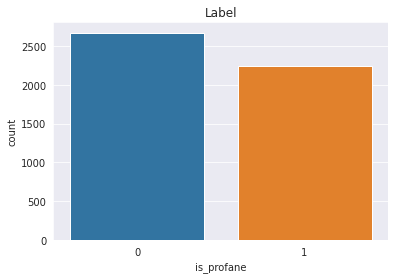

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")
sns.countplot(Y).set_title('Label')
plt.show()

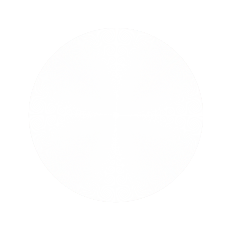

In [7]:
plt.pie(Y)
plt.show()

In [8]:
!pip install pyvi

     |████████████████████████████████| 8.5MB 2.5MB/s 
     |████████████████████████████████| 747kB 36.3MB/s 


In [9]:
# Tách từ
from pyvi import ViTokenizer
class NLP(object):
    def __init__(self, text = None):
        self.text = text
        #self.set_stopwords()

    def segmentation(self):
        return ViTokenizer.tokenize(self.text)


In [10]:
# hàm clean data - loại bỏ các ký tự đặc biệt
import re, string
def clean_text(text):
  if type(text) != str:
    return
  else:
    text = text.lower()
    text = re.sub('\[.*?]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
  return text 

In [11]:
# load stopword
sw =  open('stopword.txt')
data_sw = sw.readlines()
data_sw = [x.strip() for x in data_sw]

In [12]:
# hàm loại stopword
def del_stopword(txt):
    t = clean_text(txt)
    if t == '':
        return
    t = NLP(text=t).segmentation()
    #t = set(t)
    #t = list(t)
    t = t.split()
    tt = t
    for x in tt:
      if x in data_sw:
        t.remove(x)
    return t

In [13]:
n = len(X)
for i in range(n):
    X[i] = del_stopword(X[i])
    #X[i] = ' '.join(X[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
for i in range(n):
    #X[i] = del_stopword(X[i])
    X[i] = ' '.join(X[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
#csv_file = open('boom hàng.csv')

In [16]:
'''names = ['cmt', 'is_profane']
data1 = pd.read_csv(csv_file, names = names)
data1.head(10)'''

"names = ['cmt', 'is_profane']\ndata1 = pd.read_csv(csv_file, names = names)\ndata1.head(10)"

In [17]:
'''X1 = data1['cmt']
Y1= data1['is_profane']
'''

"X1 = data1['cmt']\nY1= data1['is_profane']\n"

In [18]:
#X1

In [19]:
'''n1 = len(X1)
for i in range(n1):
    X1[i] = del_stopword(X1[i])
    #X[i] = ' '.join(X[i])
for i in range(n1):
    #X[i] = del_stopword(X[i])
    X1[i] = ' '.join(X1[i])'''

"n1 = len(X1)\nfor i in range(n1):\n    X1[i] = del_stopword(X1[i])\n    #X[i] = ' '.join(X[i])\nfor i in range(n1):\n    #X[i] = del_stopword(X[i])\n    X1[i] = ' '.join(X1[i])"

In [20]:
#X1

In [21]:
model1 = LogisticRegression()
model2 = MultinomialNB()
model3 = LinearSVC()
# split test:25%, train:75%
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.5,random_state=42)

# initialize TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1,2), max_features=50000, min_df=2)

# transform words to vetor
trainX = tf.fit_transform(trainX.values).toarray()
trainVocab = tf.vocabulary_ 
tf = TfidfVectorizer(vocabulary=trainVocab)
testX = tf.fit_transform(testX.values).toarray()
print("[INFO] Used TfidfVectorizer ... ")

for i in range(3):
    
    if i == 2:
        model = LogisticRegression()
        print("   [INFO] evaluating Logistic Regression...")

    if i == 0:
        model = LinearSVC()
        print("   [INFO] evaluating SVM...")
    
    if i == 1:
        model = MultinomialNB()
        print("   [INFO] evaluating Naive Bayes...")
    
    # train and evaluating 
    model.fit(trainX, trainY)
    predictions = model.predict(testX)
    print(classification_report(testY,predictions))

[INFO] Used TfidfVectorizer ... 
   [INFO] evaluating SVM...
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1347
           1       0.85      0.81      0.83      1111

    accuracy                           0.85      2458
   macro avg       0.85      0.85      0.85      2458
weighted avg       0.85      0.85      0.85      2458

   [INFO] evaluating Naive Bayes...
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1347
           1       0.86      0.71      0.78      1111

    accuracy                           0.82      2458
   macro avg       0.82      0.81      0.81      2458
weighted avg       0.82      0.82      0.81      2458

   [INFO] evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1347
           1       0.89      0.73      0.80      1111

    accuracy                           0.

In [22]:
'''model1 = LogisticRegression()
model2 = MultinomialNB()
model3 = LinearSVC()
# split test:25%, train:75%
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.5,random_state=42)

# initialize TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1,2), max_features=50000, min_df=2)

# transform words to vetor
trainX = tf.fit_transform(trainX.values).toarray()
trainVocab = tf.vocabulary_ 
tf = TfidfVectorizer(vocabulary=trainVocab)
X1 = tf.fit_transform(X1.values).toarray()
print("[INFO] Used TfidfVectorizer ... ")

for i in range(3):
    
    if i == 2:
        model = LogisticRegression()
        print("   [INFO] evaluating Logistic Regression...")

    if i == 0:
        model = LinearSVC()
        print("   [INFO] evaluating SVM...")
    
    if i == 1:
        model = MultinomialNB()
        print("   [INFO] evaluating Naive Bayes...")
    
    # train and evaluating 
    model.fit(trainX, trainY)
    predictions = model.predict(X1)
    print(classification_report(Y1,predictions))'''

'model1 = LogisticRegression()\nmodel2 = MultinomialNB()\nmodel3 = LinearSVC()\n# split test:25%, train:75%\ntrainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.5,random_state=42)\n\n# initialize TfidfVectorizer\ntf = TfidfVectorizer(ngram_range=(1,2), max_features=50000, min_df=2)\n\n# transform words to vetor\ntrainX = tf.fit_transform(trainX.values).toarray()\ntrainVocab = tf.vocabulary_ \ntf = TfidfVectorizer(vocabulary=trainVocab)\nX1 = tf.fit_transform(X1.values).toarray()\nprint("[INFO] Used TfidfVectorizer ... ")\n\nfor i in range(3):\n    \n    if i == 2:\n        model = LogisticRegression()\n        print("   [INFO] evaluating Logistic Regression...")\n\n    if i == 0:\n        model = LinearSVC()\n        print("   [INFO] evaluating SVM...")\n    \n    if i == 1:\n        model = MultinomialNB()\n        print("   [INFO] evaluating Naive Bayes...")\n    \n    # train and evaluating \n    model.fit(trainX, trainY)\n    predictions = model.predict(X1)\n    print(clas

In [23]:
def processing(text):
    text = clean_text(text)
    text = del_stopword(text)
    text = ' '.join(text)
    text = tf.fit_transform([text])
    return text
    

In [34]:
text = ''
text = processing(text)
predict = model.predict(text)

if predict == 1:
  print("câu bình luận thô tục, xúc phạm, cần được xóa")
else:
  print('Câu bình luận bình thường')

Câu bình luận bình thường


In [25]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']